# Testing

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from statistics import mean
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.core.common import SettingWithCopyWarning
import warnings

In [122]:
data = './datasets/anime_data.csv'

In [123]:
df = pd.read_csv(data)

In [124]:
df.head(2)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV


In [125]:
df.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


In [126]:
df.isnull().sum()

mal_id              0
aired_from          5
aired_to         5368
duration            0
episodes            0
genres              0
popularity          0
premiered        7880
rank             1282
rating              0
score               0
scored_by           0
source              0
status              0
studios             0
synopsis          237
title               0
title_english    5941
type                0
dtype: int64

Missing value = premiered = 7880, rank = 1282, synopis = 237, title_eng = 5941

In [127]:
df = df.dropna()
df.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24 min per ep,73,"['Action', 'Fantasy', 'Game', 'Shounen']",2167,Spring 2011,6482.0,PG-13 - Teens 13 or older,6.35,23161,Manga,Finished Airing,"[{'mal_id': 36, 'name': 'Gallop'}]",Yu☆Gi☆Oh! Zexal follows the adventures of Yuum...,Yu☆Gi☆Oh! Zexal,Yu-Gi-Oh! Zexal,TV
15,10030,2011-10-01T00:00:00+00:00,2012-03-24T00:00:00+00:00,24 min per ep,25,"['Comedy', 'Drama', 'Romance', 'Shounen']",450,Fall 2011,135.0,PG-13 - Teens 13 or older,8.41,162355,Manga,Finished Airing,"[{'mal_id': 7, 'name': 'J.C.Staff'}]","With the serialization of their new manga, ""De...",Bakuman. 2nd Season,Bakuman.,TV


In [68]:
print('Num of dup: ', df.duplicated().sum())

Num of dup:  0


In [69]:
df['type'].unique()

array(['TV'], dtype=object)

In [70]:
df['source'].unique()

array(['Original', 'Manga', 'Game', 'Visual novel', 'Light novel',
       'Novel', 'Unknown', '4-koma manga', 'Other', 'Web manga',
       'Card game', 'Music', 'Book', 'Picture book', 'Digital manga'],
      dtype=object)

In [71]:
dummie1 = pd.get_dummies(df.type)
dummie1.head(5)

,TV
0,1
1,1
2,1
8,1
15,1


In [72]:
import numpy as np
import scipy as sc
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [73]:
label = LabelEncoder()

In [74]:
dummie2 = pd.get_dummies(df.source)
dummie2.head(5)

,4-koma manga,Book,Card game,Digital manga,Game,Light novel,Manga,Music,Novel,Original,Other,Picture book,Unknown,Visual novel,Web manga
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [75]:
print("Type: \n", df["source"].value_counts())

Type: 
 Manga            898
Original         512
Light novel      279
Game             136
Unknown          127
Visual novel     108
Novel             84
4-koma manga      82
Web manga         57
Other             51
Book              19
Card game         17
Music              5
Digital manga      5
Picture book       4
Name: source, dtype: int64


In [76]:
dummie2 = dummie2.drop(['Picture book', 'Digital manga', 'Music'], axis = 'columns')
dummie2.head(4)

,4-koma manga,Book,Card game,Game,Light novel,Manga,Novel,Original,Other,Unknown,Visual novel,Web manga
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0


In [77]:
df_merge = pd.concat([df, dummie1, dummie2], axis = 'columns')
df_merge.head(4)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,...,Card game,Game,Light novel,Manga,Novel,Original,Other,Unknown,Visual novel,Web manga
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),...,0,0,0,0,0,1,0,0,0,0
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,...,0,0,0,1,0,0,0,0,0,0
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,...,0,0,0,1,0,0,0,0,0,0
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24 min per ep,73,"['Action', 'Fantasy', 'Game', 'Shounen']",2167,Spring 2011,6482.0,PG-13 - Teens 13 or older,...,0,0,0,1,0,0,0,0,0,0


In [78]:
print("Type: \n", df_merge['rating'].value_counts())

Type: 
 PG-13 - Teens 13 or older         1443
R - 17+ (violence & profanity)     362
G - All Ages                       231
R+ - Mild Nudity                   182
PG - Children                      157
None                                 9
Name: rating, dtype: int64


In [79]:
print("Rating: \n", df_merge["rating"].unique(), "\n")
print("Duration: \n", df_merge['duration'].unique(), "\n")
print("Premiered: \n", df_merge["premiered"].unique(), "\n")
print("Genre: \n", df_merge["genres"].unique(), "\n")

Rating: 
 ['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'R+ - Mild Nudity' 'G - All Ages' 'PG - Children' 'None'] 

Duration: 
 ['24 min per ep' '23 min per ep' '25 min per ep' '22 min per ep'
 '28 min per ep' '3 min per ep' '12 min per ep' '21 min per ep'
 '1 min per ep' '26 min per ep' '14 min per ep' '27 min per ep'
 '45 min per ep' '20 min per ep' '7 min per ep' '5 min per ep'
 '2 min per ep' '4 min per ep' '15 min per ep' '8 min per ep'
 '10 min per ep' '13 min per ep' '11 min per ep' '30 min per ep'
 '19 min per ep' '29 min per ep' '17 min per ep' '9 min per ep'
 '18 min per ep' '50 sec per ep' '6 min per ep' '50 min per ep'
 '16 min per ep'] 

Premiered: 
 ['Spring 1998' 'Spring 2001' 'Spring 1978' 'Spring 2011' 'Fall 2011'
 'Summer 2011' 'Winter 2005' 'Fall 1998' 'Winter 2011' 'Fall 1999'
 'Winter 2002' 'Summer 1999' 'Winter 1994' 'Summer 2012' 'Spring 2000'
 'Winter 2012' 'Fall 1996' 'Fall 1997' 'Fall 2003' 'Spring 2002'
 'Spring 2012' 'Winter 2004' 'Spring 20

In [80]:
def rating(x):
    if x == 'PG-13 - Teens 13 or older':
        return 1
    elif x == 'R - 17+ (violence & profanity)':
        return 2
    elif x == 'G - All Ages':
        return 3
    elif x == 'R+ - Mild Nudity':
        return 4
    elif x == 'PG - Children':
        return 5
    elif x == 'None':
        return 0

df_merge['rating'] = df_merge['rating'].apply(rating)

In [81]:
print("Type: \n", df_merge['rating'].value_counts())

Type: 
 1    1443
2     362
3     231
4     182
5     157
0       9
Name: rating, dtype: int64


In [82]:
df_merge['duration'] = df_merge['duration'].map(lambda x: x.rstrip(' per ep'))

In [83]:
df_merge.head(4)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,...,Card game,Game,Light novel,Manga,Novel,Original,Other,Unknown,Visual novel,Web manga
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,2,...,0,0,0,0,0,1,0,0,0,0
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,1,...,0,0,0,1,0,0,0,0,0,0
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,1,...,0,0,0,1,0,0,0,0,0,0
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24 min,73,"['Action', 'Fantasy', 'Game', 'Shounen']",2167,Spring 2011,6482.0,1,...,0,0,0,1,0,0,0,0,0,0


In [84]:
df_merge['duration'].unique()

array(['24 min', '23 min', '25 min', '22 min', '28 min', '3 min',
       '12 min', '21 min', '1 min', '26 min', '14 min', '27 min',
       '45 min', '20 min', '7 min', '5 min', '2 min', '4 min', '15 min',
       '8 min', '10 min', '13 min', '11 min', '30 min', '19 min',
       '29 min', '17 min', '9 min', '18 min', '50 sec', '6 min', '50 min',
       '16 min'], dtype=object)

In [85]:
df_merge['duration'] =  df_merge['duration'].str.replace(' min', '*1').str.replace(' sec', '*(1/60)').apply(eval)

In [86]:
df_merge.head(3)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,...,Card game,Game,Light novel,Manga,Novel,Original,Other,Unknown,Visual novel,Web manga
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24.0,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,2,...,0,0,0,0,0,1,0,0,0,0
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23.0,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,1,...,0,0,0,1,0,0,0,0,0,0
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25.0,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,1,...,0,0,0,1,0,0,0,0,0,0


In [87]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 11329
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         2384 non-null   int64  
 1   aired_from     2384 non-null   object 
 2   aired_to       2384 non-null   object 
 3   duration       2384 non-null   float64
 4   episodes       2384 non-null   int64  
 5   genres         2384 non-null   object 
 6   popularity     2384 non-null   int64  
 7   premiered      2384 non-null   object 
 8   rank           2384 non-null   float64
 9   rating         2384 non-null   int64  
 10  score          2384 non-null   float64
 11  scored_by      2384 non-null   int64  
 12  source         2384 non-null   object 
 13  status         2384 non-null   object 
 14  studios        2384 non-null   object 
 15  synopsis       2384 non-null   object 
 16  title          2384 non-null   object 
 17  title_english  2384 non-null   object 
 18  type   

In [88]:
df_merge['genres'] = df_merge['genres'].str.replace("[\[\]\"']", "")

In [89]:
df_merge.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,...,Card game,Game,Light novel,Manga,Novel,Original,Other,Unknown,Visual novel,Web manga
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24.0,26,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",38,Spring 1998,27.0,2,...,0,0,0,0,0,1,0,0,0,0
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23.0,13,"Comedy, Drama, Fantasy, Magic, Romance, Shoujo...",2075,Spring 2001,2703.0,1,...,0,0,0,1,0,0,0,0,0,0
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25.0,42,"Action, Sci-Fi, Adventure, Space, Drama, Seinen",2980,Spring 1978,1008.0,1,...,0,0,0,1,0,0,0,0,0,0
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24.0,73,"Action, Fantasy, Game, Shounen",2167,Spring 2011,6482.0,1,...,0,0,0,1,0,0,0,0,0,0
15,10030,2011-10-01T00:00:00+00:00,2012-03-24T00:00:00+00:00,24.0,25,"Comedy, Drama, Romance, Shounen",450,Fall 2011,135.0,1,...,0,0,0,1,0,0,0,0,0,0


In [90]:
merge_dummie = df_merge['genres'].str.get_dummies(sep = ',')

In [91]:
merge_dummie.head(5)

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Romance,School,Sci-Fi,Seinen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
new_merge = pd.concat([df_merge, merge_dummie], axis = 'columns')

In [93]:
new_merge.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,...,Romance,School,Sci-Fi,Seinen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24.0,26,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",38,Spring 1998,27.0,2,...,0,0,0,0,0,0,0,0,0,0
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23.0,13,"Comedy, Drama, Fantasy, Magic, Romance, Shoujo...",2075,Spring 2001,2703.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25.0,42,"Action, Sci-Fi, Adventure, Space, Drama, Seinen",2980,Spring 1978,1008.0,1,...,0,0,0,0,0,0,0,0,0,0
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24.0,73,"Action, Fantasy, Game, Shounen",2167,Spring 2011,6482.0,1,...,0,0,0,0,0,0,0,0,0,0
15,10030,2011-10-01T00:00:00+00:00,2012-03-24T00:00:00+00:00,24.0,25,"Comedy, Drama, Romance, Shounen",450,Fall 2011,135.0,1,...,0,0,0,0,0,0,0,0,0,0


In [94]:
new_mer = new_merge.drop(['type', 'source', 'genres'], axis = 'columns')
new_mer.head(4)

,mal_id,aired_from,aired_to,duration,episodes,popularity,premiered,rank,rating,score,...,Romance,School,Sci-Fi,Seinen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24.0,26,38,Spring 1998,27.0,2,8.79,...,0,0,0,0,0,0,0,0,0,0
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23.0,13,2075,Spring 2001,2703.0,1,7.21,...,0,0,0,0,0,0,0,0,0,0
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25.0,42,2980,Spring 1978,1008.0,1,7.71,...,0,0,0,0,0,0,0,0,0,0
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24.0,73,2167,Spring 2011,6482.0,1,6.35,...,0,0,0,0,0,0,0,0,0,0


In [95]:
new_mer[['premiered_season', 'premiered_year']] = new_mer['premiered'].str.split(expand = True)

In [96]:
new_mer.head(5)

,mal_id,aired_from,aired_to,duration,episodes,popularity,premiered,rank,rating,score,...,Sci-Fi,Seinen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,premiered_season,premiered_year
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24.0,26,38,Spring 1998,27.0,2,8.79,...,0,0,0,0,0,0,0,0,Spring,1998
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23.0,13,2075,Spring 2001,2703.0,1,7.21,...,0,0,0,0,0,0,0,0,Spring,2001
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25.0,42,2980,Spring 1978,1008.0,1,7.71,...,0,0,0,0,0,0,0,0,Spring,1978
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24.0,73,2167,Spring 2011,6482.0,1,6.35,...,0,0,0,0,0,0,0,0,Spring,2011
15,10030,2011-10-01T00:00:00+00:00,2012-03-24T00:00:00+00:00,24.0,25,450,Fall 2011,135.0,1,8.41,...,0,0,0,0,0,0,0,0,Fall,2011


In [97]:
new_mer.head(4)

,mal_id,aired_from,aired_to,duration,episodes,popularity,premiered,rank,rating,score,...,Sci-Fi,Seinen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,premiered_season,premiered_year
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24.0,26,38,Spring 1998,27.0,2,8.79,...,0,0,0,0,0,0,0,0,Spring,1998
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23.0,13,2075,Spring 2001,2703.0,1,7.21,...,0,0,0,0,0,0,0,0,Spring,2001
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25.0,42,2980,Spring 1978,1008.0,1,7.71,...,0,0,0,0,0,0,0,0,Spring,1978
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24.0,73,2167,Spring 2011,6482.0,1,6.35,...,0,0,0,0,0,0,0,0,Spring,2011


In [98]:
new_mer.premiered_season

0        Spring
1        Spring
2        Spring
8        Spring
15         Fall
          ...  
11315    Spring
11319    Spring
11325      Fall
11326      Fall
11329    Spring
Name: premiered_season, Length: 2384, dtype: object

In [99]:
def season(x):
    if x == 'Spring':
        return 1
    elif x == 'Fall':
        return 2
    elif x == 'Winter':
        return 3
    elif x == 'Summer':
        return 4
new_mer['premiered_season'] = new_mer['premiered_season'].apply(season)

In [100]:
new_mer.head(3)

,mal_id,aired_from,aired_to,duration,episodes,popularity,premiered,rank,rating,score,...,Sci-Fi,Seinen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,premiered_season,premiered_year
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24.0,26,38,Spring 1998,27.0,2,8.79,...,0,0,0,0,0,0,0,0,1,1998
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23.0,13,2075,Spring 2001,2703.0,1,7.21,...,0,0,0,0,0,0,0,0,1,2001
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25.0,42,2980,Spring 1978,1008.0,1,7.71,...,0,0,0,0,0,0,0,0,1,1978


In [101]:
new_mer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 11329
Columns: 103 entries, mal_id to premiered_year
dtypes: float64(3), int64(78), object(9), uint8(13)
memory usage: 1.7+ MB


In [102]:
new_mer['Web manga'] = new_mer['Web manga'].astype(np.int64)
new_mer['TV'] = new_mer['TV'].astype(np.int64)
new_mer['4-koma manga'] = new_mer['4-koma manga'].astype(np.int64)
new_mer['Book'] = new_mer['Book'].astype(np.int64)
new_mer['Game'] = new_mer['Game'].astype(np.int64)
new_mer['Light novel'] = new_mer['Light novel'].astype(np.int64)
new_mer['Manga'] = new_mer['Manga'].astype(np.int64)
new_mer['Novel'] = new_mer['Novel'].astype(np.int64)
new_mer['Original'] = new_mer['Original'].astype(np.int64)
new_mer['Other'] = new_mer['Other'].astype(np.int64)
new_mer['Unknown'] = new_mer['Unknown'].astype(np.int64)
new_mer['Visual novel'] = new_mer['Visual novel'].astype(np.int64)
new_mer['Card game'] = new_mer['Card game'].astype(np.int64)

In [103]:
new_mer.set_index('title', inplace=True)

In [104]:
new_mer.head(4)

,mal_id,aired_from,aired_to,duration,episodes,popularity,premiered,rank,rating,score,...,Sci-Fi,Seinen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,premiered_season,premiered_year
title,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24.0,26,38,Spring 1998,27.0,2,8.79,...,0,0,0,0,0,0,0,0,1,1998
Shin Shirayuki-hime Densetsu Prétear,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23.0,13,2075,Spring 2001,2703.0,1,7.21,...,0,0,0,0,0,0,0,0,1,2001
Uchuu Kaizoku Captain Herlock,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25.0,42,2980,Spring 1978,1008.0,1,7.71,...,0,0,0,0,0,0,0,0,1,1978
Yu☆Gi☆Oh! Zexal,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24.0,73,2167,Spring 2011,6482.0,1,6.35,...,0,0,0,0,0,0,0,0,1,2011


In [105]:
new_mer = new_mer.drop(['premiered', 'aired_from', 'aired_to', 'studios', 'synopsis', 'status', 'title_english', 'mal_id', 'popularity', 'scored_by'], axis = 'columns')

In [106]:
# new_mer = new_mer.drop(['synopsis', 'status', 'title_english', 'mal_id'], axis = 'columns')

In [107]:
# new_mer = new_mer.drop(['popularity'], axis = 'columns')

In [108]:
new_mer.head(4)

,duration,episodes,rank,rating,score,TV,4-koma manga,Book,Card game,Game,...,Sci-Fi,Seinen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,premiered_season,premiered_year
title,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,24.0,26,27.0,2,8.79,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1998
Shin Shirayuki-hime Densetsu Prétear,23.0,13,2703.0,1,7.21,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2001
Uchuu Kaizoku Captain Herlock,25.0,42,1008.0,1,7.71,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1978
Yu☆Gi☆Oh! Zexal,24.0,73,6482.0,1,6.35,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2011


In [109]:
new_mer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2384 entries, Cowboy Bebop to Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.
Data columns (total 92 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          2384 non-null   float64
 1   episodes          2384 non-null   int64  
 2   rank              2384 non-null   float64
 3   rating            2384 non-null   int64  
 4   score             2384 non-null   float64
 5   TV                2384 non-null   int64  
 6   4-koma manga      2384 non-null   int64  
 7   Book              2384 non-null   int64  
 8   Card game         2384 non-null   int64  
 9   Game              2384 non-null   int64  
 10  Light novel       2384 non-null   int64  
 11  Manga             2384 non-null   int64  
 12  Novel             2384 non-null   int64  
 13  Original          2384 non-null   int64  
 14  Other             2384 non-null   int64  
 15  Unknown           2384 non-null

## Testing for clustering

In [110]:
X = new_mer.drop(['score'], axis = 1)
y = new_mer['score'].copy()

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# Preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2)

In [113]:
kmeans.labels_[:20]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
      dtype=int32)

In [114]:
y_test_pred = kmeans.predict(X_test_scaled)
y_test_pred[:20]

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
      dtype=int32)

In [115]:
kmeans.cluster_centers_

array([[-2.16682498e-01, -1.50644144e-01, -6.64992071e-02,
        -2.11866989e-01,  0.00000000e+00,  1.72504655e-01,
        -6.03724537e-02,  3.48893341e-02, -1.27372053e-01,
         9.19991786e-02,  9.19325186e-02, -1.36111814e-02,
        -2.03144903e-01, -1.91231606e-02, -1.73671960e-01,
         1.33582554e-01,  1.34866369e-01, -3.71606252e-01,
        -5.80258853e-02, -8.98544133e-02,  3.62582686e-02,
        -1.85729497e-02, -8.85175034e-03,  9.86184274e-02,
        -2.10658469e-01, -1.09482268e-01,  1.49043818e-01,
        -1.45618443e-01,  1.06288501e-02,  4.44563881e-02,
        -1.29927181e-01, -1.12396760e-01, -1.54501202e-01,
        -2.99723480e-01, -2.01411499e-01,  6.91282717e-02,
        -4.22527372e-02,  3.23747514e-02, -5.93355934e-02,
         6.80310055e-02,  2.96252797e-01, -1.14722512e-01,
         3.74430186e-01, -3.56412330e-01,  1.20510418e-01,
         8.88385990e-02,  6.66699880e-02, -1.51357519e-01,
         9.61222198e-02,  2.12472280e-01, -1.80408665e-0

In [116]:
pip install mglearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [117]:
import mglearn

Text(0, 0.5, 'Feature rating')

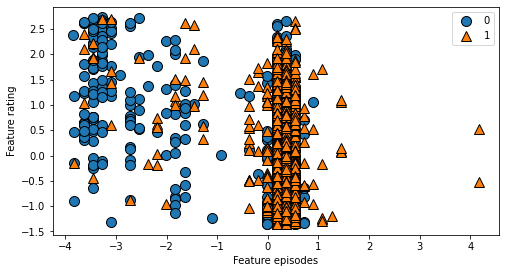

In [118]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 2], kmeans.labels_)
plt.legend(np.unique(kmeans.labels_), loc = "best")
plt.gca().set_aspect("equal")
plt.xlabel("Feature episodes")
plt.ylabel("Feature rating")

In [129]:
df = './datasets/user_score_data.csv'

In [130]:
df = pd.read_csv(df)

In [134]:
df

,Unnamed: 0,user_id,mal_id,rating
0,0,1,29978,6
1,1,1,2467,10
2,2,1,28789,6
3,3,1,34881,6
4,4,1,101,10
...,...,...,...,...
948893,948893,2195,37055,10
948894,948894,2195,40298,0
948895,948895,2195,34904,9
948896,948896,2195,34742,4


In [133]:
df.isnull().sum()

Unnamed: 0    0
user_id       0
mal_id        0
rating        0
dtype: int64